In [1]:
using Multilane
using POMDPs
using POMDPToolbox
using MCTS
using Distributions # for Normal
using DataArrays
using DataFrames
using DataFramesMeta

using Interact
using Reactive
#using Records
using AutoViz
using AutomotiveDrivingModels
#using Cairo
#using Reel
#using GenerativeModels

In [2]:
#Set up problem configuration
nb_lanes = 4
pp = PhysicalParam(nb_lanes,lane_length=400.) #2.=>col_length=8
_discount = 1.0
nb_cars=30

rmodel = NoCrashRewardModel()

dmodel = NoCrashIDMMOBILModel(nb_cars, pp)

mdp = NoCrashMDP{NoCrashRewardModel}(dmodel, rmodel, _discount)

#mdp = MLMDP{MLState, MLAction, dmodel, rmodel, _discount}

rng = MersenneTwister(5)


#s = initial_state(mdp::NoCrashMDP, rng::AbstractRNG)
#s = MLState(0.0, 0.0, CarState[CarState(pp.lane_length/2, 1.0, pp.v_med, 0.0, NORMAL, 1)])
#s = initial_state_distribution(mdp)

#sim = relaxed_initial_state_cz(mdp, 50, rng)
#s = initial_state(mdp:MDP, rng::AbstractRNG)
# @show s.env_cars[1]
#visualize(mdp,s,MLAction(0,0))

#policy = RandomPolicy(mdp)

#sim = HistoryRecorder(rng=rng, max_steps=100) # initialize a random number generator

#ss = get_initial_state(sim, mdp)

#sim = simulate(sim, mdp, policy, s)

MersenneTwister(UInt32[0x00000005], Base.dSFMT.DSFMT_state(Int32[-85655800, 1072952617, -522203688, 1073721902, 1588056292, 1072823262, 1930843968, 1073164255, -719121749, 1073022455  …  647343590, 1073165527, 1405924594, 1072769931, 1969171087, 42945320, -226019479, -1469955508, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 382)

In [3]:
is = relaxed_initial_state(mdp,200);

In [4]:
sim = relaxed_initial_state_cz2(mdp,is,200, rng);


In [5]:
steps = 200;

In [6]:
function get_sim_t_state(t::Int)
   s = sim.state_hist[t]
   a = sim.action_hist[t]
   sp = sim.state_hist[t+1]
   idx = Nullable{Int}()
end

get_sim_t_state (generic function with 1 method)

In [7]:
get_sim_t_state(70)
pp = mdp.dmodel.phys_param
roadway = gen_straight_roadway(pp.nb_lanes,
                               pp.lane_length,
                               lane_width=pp.w_lane)




cidol = CarIDOverlay()
cvol = CarVelOverlay()

idx = Nullable{Int}()

framerate = 6
ticks = fps(framerate)
timestamps = map(_-> time(),ticks)

1.524618817519458e9

In [8]:
function drawsim(timet)
    t = round(Int,rem(round(timet*framerate),steps-1)+1)
    s = sim.state_hist[t]
    a = sim.action_hist[t]
    sp = sim.state_hist[t+1]
    hbol = HardBrakeOverlay(pp, braking_ids(mdp, s, sp))
    iol = InfoOverlay(pp, idx,
                  s.cars[1].vel,
                  max_braking(mdp, s, sp),
                  is_crash(mdp, s, sp))
    scene = Scene()
    egox = s.x
    controls = s.Control_Signal
    for cs in s.cars
        push!(scene, Vehicle(VehicleState(VecSE2(cs.x, (cs.y-1.0)*pp.w_lane, 0.0), roadway, cs.vel, egox, controls),
                                #VehicleDef(cs.id, AgentClass.CAR, pp.l_car, pp.w_car)))
                                VehicleDef(AgentClass.CAR, pp.l_car, pp.w_car),cs.id))
    end
    
    render(scene, roadway,[CarFollowingStatsOverlay(1)], cam=FitToContentCamera(),car_colors=carcolors,canvas_height=220)
end

drawsim (generic function with 1 method)

In [9]:
carcolors = Dict{Int,Colorant}()
carcolors[1] = colorant"green"

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] max(::Array{Float64,1}, ::Array{Float64,1}) at ./deprecated.jl:57
 [3] poly_intersect(::Array{Array{Float64,2},1}, ::Array{Array{Float64,2},1}) at /home/zhong/.julia/v0.6/Multilane/src/crash.jl:80
 [4] #is_crash#5(::Bool, ::Function, ::Multilane.MLMDP{Multilane.MLState,Multilane.MLAction,Multilane.NoCrashIDMMOBILModel,Multilane.NoCrashRewardModel}, ::Multilane.MLState, ::Multilane.MLState, ::Bool) at /home/zhong/.julia/v0.6/Multilane/src/crash.jl:199
 [5] is_crash(::Multilane.MLMDP{Multilane.MLState,Multilane.MLAction,Multilane.NoCrashIDMMOBILModel,Multilane.NoCrashRewardModel}, ::Multilane.MLState, ::Multilane.MLState) at /home/zhong/.julia/v0.6/Multilane/src/crash.jl:120
 [6] drawsim(::Float64) at ./In[8]:7
 [7] (::Reactive.##33#34{#drawsim,Reactive.Signal{Cairo.CairoSurface{UInt32}},Tuple{Reactive.Signal{Float64}}})() at /home/zhong/.julia/v0.6/Reactive/src/operators.jl:39
 [8] foreach(::Reactive.#runaction, ::A

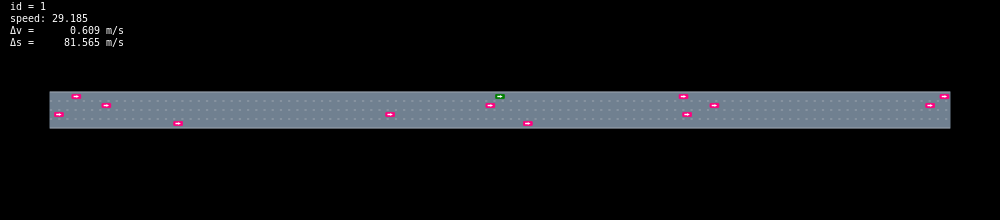

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] max(::Array{Float64,1}, ::Array{Float64,1}) at ./deprecated.jl:57
 [3] poly_intersect(::Array{Array{Float64,2},1}, ::Array{Array{Float64,2},1}) at /home/zhong/.julia/v0.6/Multilane/src/crash.jl:89
 [4] #is_crash#5(::Bool, ::Function, ::Multilane.MLMDP{Multilane.MLState,Multilane.MLAction,Multilane.NoCrashIDMMOBILModel,Multilane.NoCrashRewardModel}, ::Multilane.MLState, ::Multilane.MLState, ::Bool) at /home/zhong/.julia/v0.6/Multilane/src/crash.jl:199
 [5] is_crash(::Multilane.MLMDP{Multilane.MLState,Multilane.MLAction,Multilane.NoCrashIDMMOBILModel,Multilane.NoCrashRewardModel}, ::Multilane.MLState, ::Multilane.MLState) at /home/zhong/.julia/v0.6/Multilane/src/crash.jl:120
 [6] drawsim(::Float64) at ./In[8]:7
 [7] (::Reactive.##33#34{#drawsim,Reactive.Signal{Cairo.CairoSurface{UInt32}},Tuple{Reactive.Signal{Float64}}})() at /home/zhong/.julia/v0.6/Reactive/src/operators.jl:39
 [8] foreach(::Reactive.#runaction, ::A

In [10]:
map(drawsim,timestamps)

methods(DataArray)